In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#load some data in a pandas dataframe

df = None
#df = pd.read_csv("C:/Users/.../Oilanalysis.csv") #for those who would like to work from a local drive
df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [11]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

#df.dtypes

In [12]:
# get a preview on the data

#df.head(3)
#df.describe()
#len(df["BRSTVD"])

In [13]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

#for col in df.columns: 
#    try:      
#        df[col] = pd.to_numeric(df[col]) 
#        df.hist(column=col)
#    except ValueError:
#        print("The column "+col+' can not be represented as a histogram')

In [14]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

#dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
#dummy.corr(min_periods=15)
#plt.matshow(dummy.corr(min_periods=15))
#plt.show()
#print(dummy.columns)

#del dummy

In [15]:
# convert categorical variables into indicator functions

df = pd.get_dummies(df,columns=["Age"])
#df


In [17]:
# define the response variable and convert it into an np.array

y=np.array(df["Age_After 1 year"])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [38]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier


In [46]:
# define the explanatory variables

X=df.iloc[:,:34]
X_names=df.iloc[:,:34].columns


In [47]:
# impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [54]:
# create a training set and a validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = None, stratify=y)

#print('X_train Shape:', X_train.shape)
#print('y_train Shape:', y_train.shape)
#print('X_test Shape:', X_test.shape)
#print('Y_test Shape:', y_test.shape)


In [55]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = None)

# Train the model on training data

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [56]:
# validate the random forest using the test set

predictions = rf.predict(X_test)


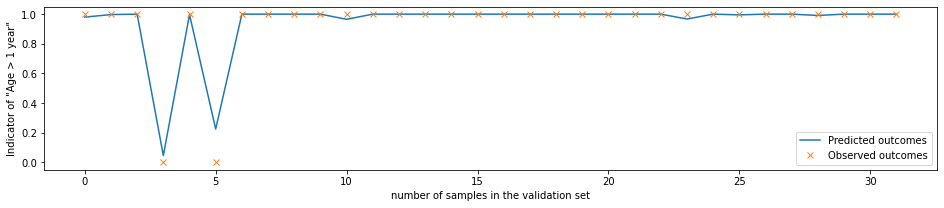

In [57]:
# plot the result of the validation

plt.figure(figsize=(16,3))
plt.plot(range(len(predictions)), predictions, '-', label="Predicted outcomes")
plt.plot(range(len(y_test)), y_test, 'x', label="Observed outcomes")
plt.xlabel('number of samples in the validation set')
plt.ylabel('Indicator of "Age > 1 year"')
plt.legend()
plt.show()


[Text(200.88000000000002, 181.2, 'CU <= 1.5\nmse = 0.059\nsamples = 59\nvalue = 0.938'),
 Text(133.92000000000002, 108.72, 'LNF-NMW <= 14.5\nmse = 0.24\nsamples = 6\nvalue = 0.4'),
 Text(66.96000000000001, 36.23999999999998, 'mse = 0.0\nsamples = 4\nvalue = 0.0'),
 Text(200.88000000000002, 36.23999999999998, 'mse = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(267.84000000000003, 108.72, 'mse = 0.0\nsamples = 53\nvalue = 1.0')]

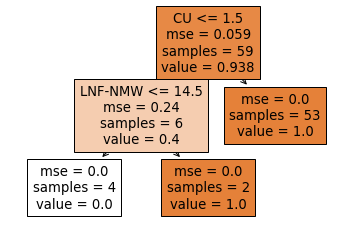

In [58]:
# depict a tree from the forest

clf = rf.estimators_[1]
tree.plot_tree(clf,feature_names=X_names, filled=True)


In [59]:
#plot the importance of the various explanatory variables

pd.DataFrame(rf.feature_importances_,index=X_names).sort_values(0,ascending=False)


,0
CU,0.655505
ISO 4406 large,0.059871
VIS40,0.029516
VIS99,0.029391
WATER,0.026007
FE,0.018969
BRSTVD,0.018849
MG,0.018823
LNF-CUT,0.016065
LNF-NMW,0.015324
